<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/08_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**


## **8장 텐서와 딥러닝 응용**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 딥러닝 스타트 저자 : 박동규
*  소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 01 텐서를 알아보자
#### 텐서플로 라이브러리


In [ ]:
# tensorflow를 tf라는 별칭으로 사용함
import tensorflow as tf

In [ ]:
# 스칼라 값에 대한 덧셈
print(tf.math.add(1, 2))

tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# 벡터 값에 대한 덧셈
print(tf.math.add([1, 2], [3, 4]))

tf.Tensor([4 6], shape=(2,), dtype=int32)


In [ ]:
# 스칼라 상수 3과 4를 곱하여 텐서 객체 형으로 반환
tf.math.multiply(3, 4)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [ ]:
# 벡터 형식의 상수 텐서 객체 정의
x = tf.constant(([1, 2, 3]))
tf.math.multiply(x, x)    # 텐서 사이의 곱셈

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9], dtype=int32)>

In [ ]:
tf.math.maximum([1, 2, 3], [4, 5, 6])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6], dtype=int32)>

---
#### 완전 연결층을 만드는 방법

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(name="my_seq")
model.add(layers.Dense(2, activation="relu", input_shape = (4,),\
          name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))
print('모델의 층 :', len(model.layers))

모델의 층 : 3


In [ ]:
print('모델의 구조 :')
model.summary()

모델의 구조 :
Model: "my_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.pop()
print('모델의 층 :', len(model.layers))

모델의 층 : 2


In [ ]:
model.summary()

Model: "my_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
#### 입력 형상 지정하기

In [ ]:
layer = layers.Dense(2)  # 2개의 노드를 가진 완전 연결층을 만든다
layer.weights            # 빈 가중치 값

[]

In [ ]:
# 테스트용 입력값을 만들도록 하자. 이 입력의 형상은 (1, 4)이다
x = tf.ones((1, 4))
y = layer(x)
# 가중치의 형상은 (4, 2) 이며 편향값의 형상은 (2,)이다
layer.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.5332501 , -0.6925497 ],
        [-0.7929313 , -0.66449714],
        [-0.02370167,  0.11928797],
        [ 0.6476743 , -0.0115118 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

### 02 붓꽃 데이터를 분류하는 딥러닝 모델
#### 붓꽃 데이터를 분류하는 모델

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_ds = load_iris()  # 붓꽃 데이터셋 가져오기

In [ ]:
iris_ds['data'].shape    # 전체 데이터의 형상

(150, 4)

In [ ]:
iris_ds['data'][:4]      # 최초 4개 데이터

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [ ]:
iris_ds['feature_names']  # 특성의 이름

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_ds['target_names']   # 레이블의 이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_ds['target'][:4]    # 처음 4개 데이터의 레이블값

array([0, 0, 0, 0])

In [ ]:
iris_ds['target']   # 레이블을 모두 출력

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(\
    iris_ds['data'], iris_ds['target'], random_state=0, test_size=0.20)
# 학습 데이터와 테스트 데이터의 형태와 개별 훈련 데이터의 형태를 살펴보자.
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)
개별 훈련 데이터의 형태: (4,)


#### 붓꽃 데이터를 분류하는 여러 가지 순차 모델

In [ ]:
from tensorflow import keras

# 첫 번째 순차 모델을 생성하자
model1 = keras.models.Sequential( [
    keras.layers.Dense(32, activation= 'relu', input_shape = (4,)),
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일을 위한 최적화 방법, 손실 함수, 성능 측정 방법을 지정
model1.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',\
             metrics=['accuracy'])

print('model1 학습중...')
model1.fit(x_train, y_train, epochs=10, batch_size=5, verbose=1)

model1 학습중...
Epoch 1/10
24/24 [==============================] - 0s 1ms/step - loss: 1.4235 - accuracy: 0.3250
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 1.0738 - accuracy: 0.3417
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.9876 - accuracy: 0.4417
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.8953 - accuracy: 0.6833
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.8302 - accuracy: 0.6917
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.7083
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.7092 - accuracy: 0.6917
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6917
Epoch 9/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7167
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.6917


In [ ]:
# 확인용 코드 - 본문에는 없음
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                160       
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('model1의 테스트 결과 :')
eval_loss, eval_acc = model1.evaluate(x_test, y_test)
print('model1의 붓꽃 데이터의 분류 정확도 :', eval_acc)

model1의 테스트 결과 :
1/1 [==============================] - 0s 107ms/step - loss: 0.6267 - accuracy: 0.5667
model1의 붓꽃 데이터의 분류 정확도 : 0.5666666626930237


In [ ]:
from tensorflow import keras

# 두 번째 순차 모델을 생성하자
model2 = keras.models.Sequential( [
    keras.layers.Dense(32, activation= 'relu', input_shape = (4,)),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일
model2.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',\
             metrics=['accuracy'])

print('model2 학습중...')
model2.fit(x_train, y_train, epochs=10, batch_size=5, verbose=1)

model2 학습중...
Epoch 1/10
24/24 [==============================] - 1s 1ms/step - loss: 1.8372 - accuracy: 0.3333
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7000
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7250
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8083
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.7583
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.9167
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.9333
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9250
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.9167
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.9250


In [ ]:
print('model2의 테스트 결과 :')
eval_loss, eval_acc = model2.evaluate(x_test, y_test)
print('model2의 붓꽃 데이터의 분류 정확도 :', eval_acc)

model2의 테스트 결과 :
1/1 [==============================] - 0s 91ms/step - loss: 0.2378 - accuracy: 0.9667
model2의 붓꽃 데이터의 분류 정확도 : 0.9666666388511658


In [ ]:
from tensorflow import keras

# 세 번째 순차 모델을 생성하자
model3 = keras.models.Sequential( [
    keras.layers.Dense(32, activation= 'relu', input_shape = (4,)),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일
model3.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',\
             metrics=['accuracy'])

print('model3 학습중...')
hist = model3.fit(x_train, y_train, epochs=30, batch_size=5)

model3 학습중...
Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 1.4125 - accuracy: 0.3250
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.3917
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.6917
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.6917
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.7000
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7000
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7417
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7500
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8583
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8333
Epoch

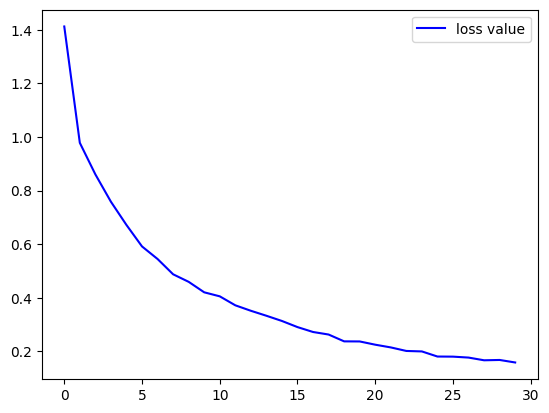

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

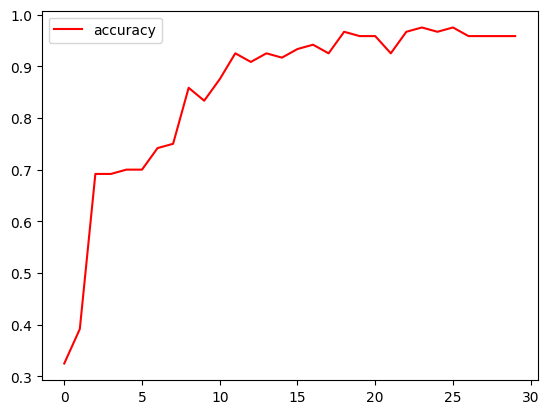

In [ ]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

---
### 03 딥러닝 모델을 저장하고 불러오기
#### 붓꽃 데이터를 분류하는 모델

In [ ]:
model1.save('./iris_model1.h5')
model2.save('./iris_model2.h5')

In [ ]:
!ls -l

total 164
-rw-r--r-- 1 root root 28248 Feb 15 01:14 iris_model1.h5
-rw-r--r-- 1 root root 45936 Feb 15 01:14 iris_model2.h5
-rw-r--r-- 1 root root 84592 Feb 15 01:14 iris_model3.h5
drwxr-xr-x 1 root root  4096 Feb 13 14:23 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 구글 드라이브에 iris_model1, 2 파일을 저장하자
model1.save('./drive/MyDrive/iris_model1.h5')
model2.save('./drive/MyDrive/iris_model2.h5')

In [ ]:
loaded1 = keras.models.load_model('./drive/MyDrive/iris_model1.h5')

In [ ]:
loaded1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                160       
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('model1의 테스트 결과 :')
eval_loss, eval_acc = model1.evaluate(x_test, y_test)
print('model1의 붓꽃 데이터의 분류 정확도 :', eval_acc)

model1의 테스트 결과 :
1/1 [==============================] - 0s 110ms/step - loss: 0.5737 - accuracy: 0.6667
model1의 붓꽃 데이터의 분류 정확도 : 0.6666666865348816


In [ ]:
print('loaded1의 테스트 결과 :')
eval_loss, eval_acc = loaded1.evaluate(x_test, y_test)
print('loaded1의 붓꽃 데이터의 분류 정확도 :', eval_acc)

loaded1의 테스트 결과 :
1/1 [==============================] - 0s 234ms/step - loss: 0.5737 - accuracy: 0.6667
loaded1의 붓꽃 데이터의 분류 정확도 : 0.6666666865348816


In [ ]:
loaded2 = keras.models.load_model('./drive/MyDrive/iris_model2.h5')
loaded2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 30)                990       
                                                                 
 dense_5 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
### 04 회귀문제를 딥러닝을 통해서 풀어보자
#### 회귀 문제를 위한 데이터를 만들고 해석하자

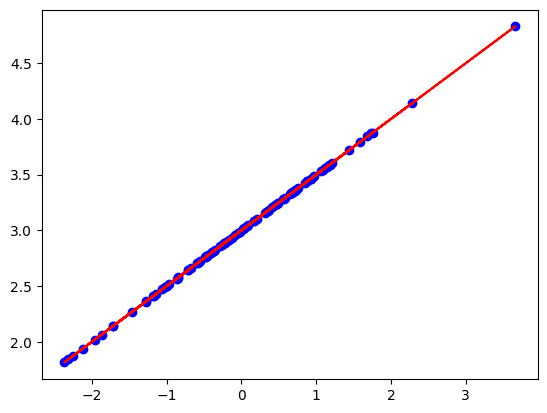

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100   # 100개의 점을 만들것이다
x_data = np.random.normal(0, 1.1, n)
y_data = .5 * x_data + 3  # y = .5x + 3 형태의 함수
plt.plot(x_data, y_data, 'r')
plt.scatter(x_data, y_data, c='b')

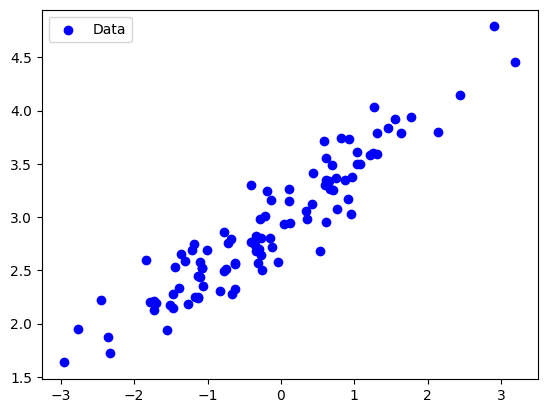

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100   # 100개의 점을 만들것이다
x_data = np.random.normal(0, 1.1, n)
y_data = .5 * x_data + 3  # y = .5x + 3 형태의 함수
y_data += np.random.normal(0, .2, n)
plt.scatter(x_data, y_data, c='b', label='Data')
plt.legend()

---
#### 회귀 문제를 풀기 위한 순차 계층 모델

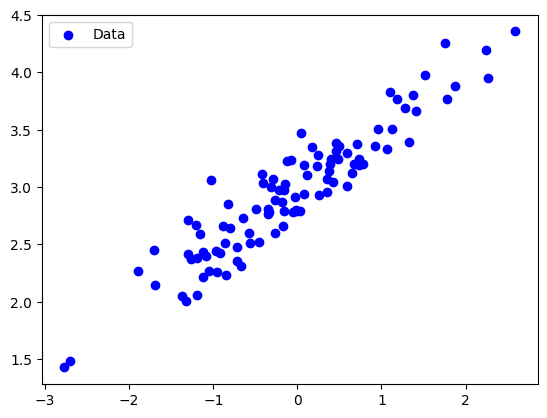

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100   # 100개의 점을 만들것이다
x_data = np.random.normal(0, 1.1, n)
y_data = .5 * x_data + 3  # y = .5x + 3 형태의 함수
y_data += np.random.normal(0, .2, n)
plt.scatter(x_data, y_data, c='b', label='Data')
plt.legend()

In [ ]:
import tensorflow as tf

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원 임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(10, input_dim=1, activation='linear'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.summary() # 모델 구조를 확인

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 옵티마이저 - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# 비용/손실 함수를 mean_squared_error 방식을 사용한다, mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(x_data, y_data, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 2s 10ms/step - loss: 4.9644
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.2703
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0386
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0346
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0356
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 8/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0353
Epoch 9/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0364
Epoch 10/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0344


Text(0, 0.5, 'Loss')

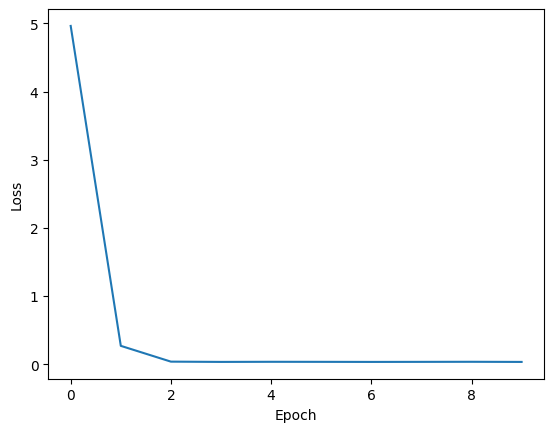

In [ ]:
# 훈련 과정 시각화 : 손실값 그래프
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

17/17 [==============================] - 0s 8ms/step


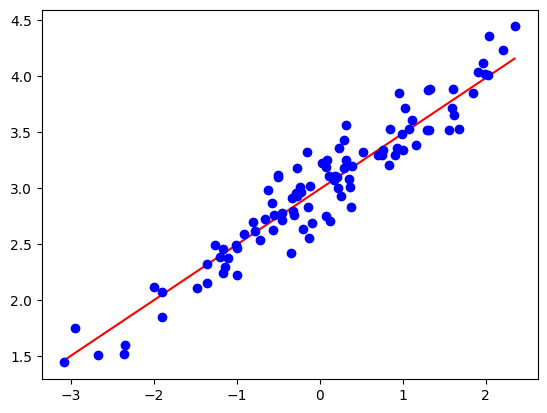

In [ ]:
# 테스트 데이터를 만들고 이 데이터를 모델의 입력으로 넣어보자
x_test = np.arange(min(x_data), max(x_data), 0.01)
y_test = model.predict(x_test)

plt.plot(x_test, y_test, 'r-') # 빨간색 실선
plt.plot(x_data, y_data, 'bo')

In [ ]:
# 모델에 6개의 데이터를 넣고 결과를 확인하는 테스트
for x in range(-3, 3):
    # 입력 x에 대한 예측 값 출력
    # 예측 값은 다차원 배열 형태이므로 이 형태에서 스칼라 값을 구함
    pred = model.predict(np.array([x]))[0][0]
    print(f'입력 : {x}, 모델의 출력 : {pred:.2f}')
    print(f'입력 : {x}, .5 * x + 3.의 출력 : {.5*x+3.}')

1/1 [==============================] - 0s 176ms/step
입력 : -3, 모델의 출력 : 1.51
입력 : -3, .5 * x + 3.의 출력 : 1.5
1/1 [==============================] - 0s 112ms/step
입력 : -2, 모델의 출력 : 2.00
입력 : -2, .5 * x + 3.의 출력 : 2.0
1/1 [==============================] - 0s 97ms/step
입력 : -1, 모델의 출력 : 2.50
입력 : -1, .5 * x + 3.의 출력 : 2.5
1/1 [==============================] - 0s 56ms/step
입력 : 0, 모델의 출력 : 2.99
입력 : 0, .5 * x + 3.의 출력 : 3.0
1/1 [==============================] - 0s 126ms/step
입력 : 1, 모델의 출력 : 3.49
입력 : 1, .5 * x + 3.의 출력 : 3.5
1/1 [==============================] - 0s 57ms/step
입력 : 2, 모델의 출력 : 3.99
입력 : 2, .5 * x + 3.의 출력 : 4.0


In [ ]:
# 입력값 3에 대한 모델의 예측값은 다차원 배열임
pred = model.predict(np.array([3]))
print(f'pred = {pred}')

1/1 [==============================] - 0s 53ms/step
pred = [[4.481589]]


In [ ]:
# 인덱싱을 통해서 스칼라 값을 추출하는 방법
pred = model.predict(np.array([3]))[0][0]
print(f'pred = {pred:.2f}')

1/1 [==============================] - 0s 80ms/step
pred = 4.48
